## Problem

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from dateutil import parser
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [3]:
df = pd.read_csv(r'https://drive.google.com/uc?export=download&id=1eYgGnsn4qE-twfjCiy9Q8HKBpZqSIybn')

In [4]:
df.shape

(50000, 12)

In [5]:
df.head()

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
0,235136,2012-12-27 02:14:51.273,3,02:00:00,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaN,0
1,333588,2012-12-02 01:16:00.905,6,01:00:00,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaN,0
2,254414,2013-03-19 19:19:09.157,1,19:00:00,23,"Splash,Cycle,Loan",3,0,1,0,NaN,1
3,234192,2013-07-05 16:08:46.354,4,16:00:00,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0
4,51549,2013-02-26 18:50:48.661,1,18:00:00,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   user                  50000 non-null  int64 
 1   first_open            50000 non-null  object
 2   dayofweek             50000 non-null  int64 
 3   hour                  50000 non-null  object
 4   age                   50000 non-null  int64 
 5   screen_list           50000 non-null  object
 6   numscreens            50000 non-null  int64 
 7   minigame              50000 non-null  int64 
 8   used_premium_feature  50000 non-null  int64 
 9   enrolled              50000 non-null  int64 
 10  enrolled_date         31074 non-null  object
 11  liked                 50000 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 4.6+ MB


In [7]:
df.isnull().sum()*100/df.shape[0]

user                     0.000
first_open               0.000
dayofweek                0.000
hour                     0.000
age                      0.000
screen_list              0.000
numscreens               0.000
minigame                 0.000
used_premium_feature     0.000
enrolled                 0.000
enrolled_date           37.852
liked                    0.000
dtype: float64

In [8]:
df.describe()

,user,dayofweek,age,numscreens,minigame,used_premium_feature,enrolled,liked
count,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,186889.729900,3.029860,31.72436,21.095900,0.107820,0.172020,0.621480,0.165000
std,107768.520361,2.031997,10.80331,15.728812,0.310156,0.377402,0.485023,0.371184
min,13.000000,0.000000,16.00000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,93526.750000,1.000000,24.00000,10.000000,0.000000,0.000000,0.000000,0.000000
50%,187193.500000,3.000000,29.00000,18.000000,0.000000,0.000000,1.000000,0.000000
75%,279984.250000,5.000000,37.00000,28.000000,0.000000,0.000000,1.000000,0.000000
max,373662.000000,6.000000,101.00000,325.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
df.dtypes

user                     int64
first_open              object
dayofweek                int64
hour                    object
age                      int64
screen_list             object
numscreens               int64
minigame                 int64
used_premium_feature     int64
enrolled                 int64
enrolled_date           object
liked                    int64
dtype: object

In [10]:
df['hour'] = df['hour'].str.slice(1,3).astype(int)

In [11]:
df.dtypes

user                     int64
first_open              object
dayofweek                int64
hour                     int32
age                      int64
screen_list             object
numscreens               int64
minigame                 int64
used_premium_feature     int64
enrolled                 int64
enrolled_date           object
liked                    int64
dtype: object

In [12]:
df.columns

Index(['user', 'first_open', 'dayofweek', 'hour', 'age', 'screen_list',
       'numscreens', 'minigame', 'used_premium_feature', 'enrolled',
       'enrolled_date', 'liked'],
      dtype='object')

In [13]:
df2 = df.drop(columns = ['user', 'first_open','screen_list','enrolled_date'])

In [14]:
df2.head(10)

,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked
0,3,2,23,15,0,0,0,0
1,6,1,24,13,0,0,0,0
2,1,19,23,3,0,1,0,1
3,4,16,28,40,0,0,1,0
4,1,18,31,32,0,0,1,1
5,2,9,20,14,0,0,1,0
6,1,2,35,3,0,0,0,0
7,1,3,26,41,0,1,0,0
8,2,14,29,33,1,1,1,0
9,4,18,26,19,0,0,1,0


## Data Visualisation

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='enrolled', ylabel='count'>

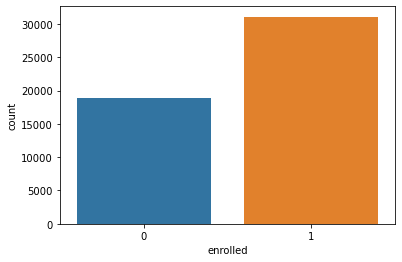

In [15]:
sns.countplot(df2['enrolled'])

<AxesSubplot:xlabel='liked', ylabel='count'>

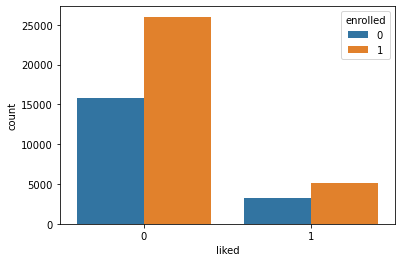

In [16]:
sns.countplot(x = 'liked', hue = 'enrolled', data = df2)

<AxesSubplot:xlabel='age', ylabel='Count'>

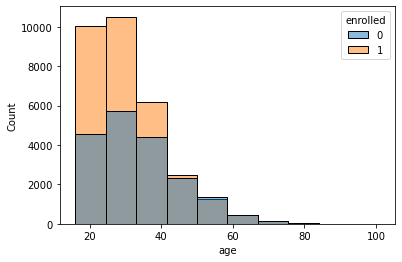

In [17]:
sns.histplot(x = 'age', hue = 'enrolled', data = df2, bins = 10)

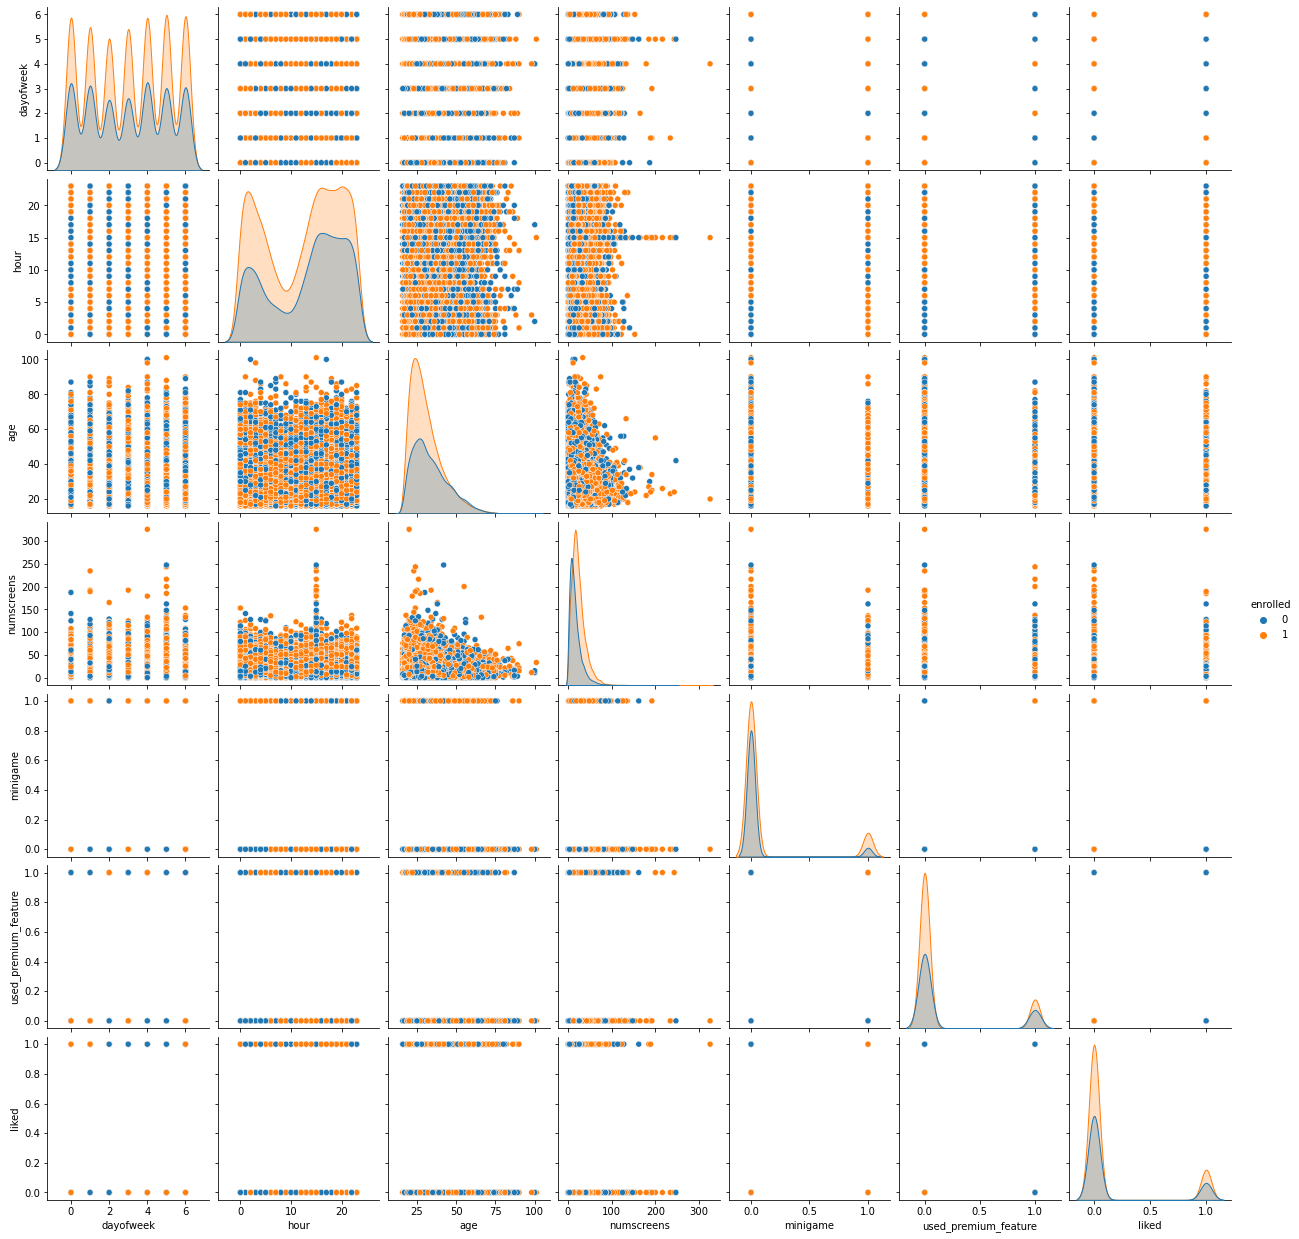

In [17]:
sns.pairplot(df2, hue = 'enrolled')

<AxesSubplot:>

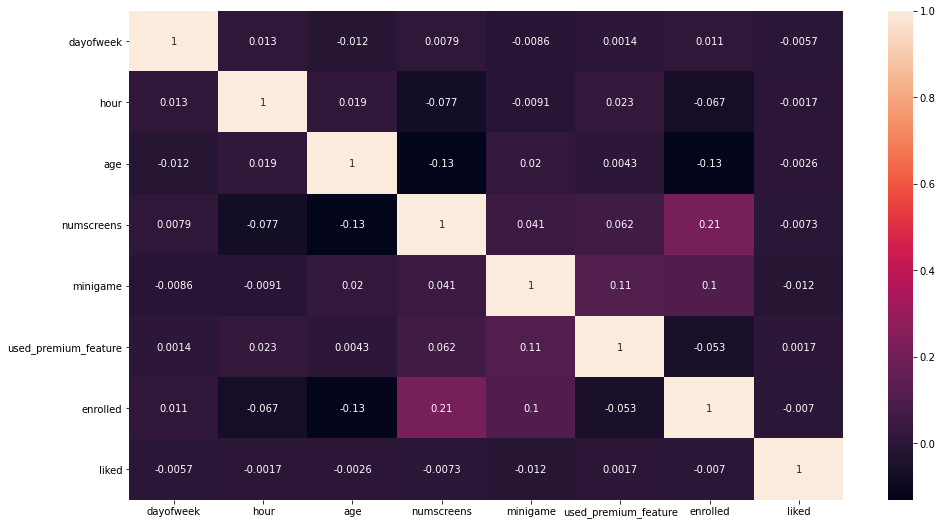

In [18]:
plt.figure(figsize = (16, 9))
sns.heatmap(df2.corr(), annot = True)

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

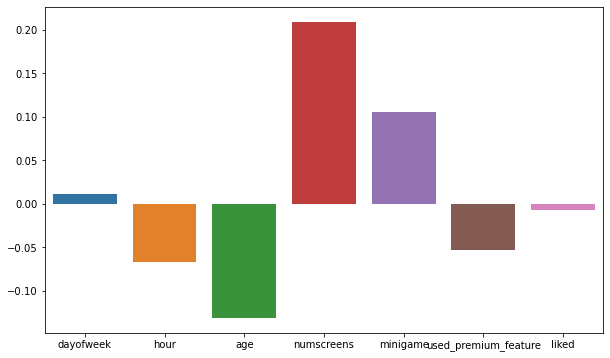

In [19]:
df1 = df2.drop(columns = ['enrolled'])
plt.figure(figsize = (10, 6))
sns.barplot(df1.corrwith(df2.enrolled).index, df1.corrwith(df2.enrolled))

In [20]:
df.dtypes

user                     int64
first_open              object
dayofweek                int64
hour                     int32
age                      int64
screen_list             object
numscreens               int64
minigame                 int64
used_premium_feature     int64
enrolled                 int64
enrolled_date           object
liked                    int64
dtype: object

In [18]:
df['first_open'] = [parser.parse(i) for i in df['first_open']]
df['enrolled_date'] = [parser.parse(i) if isinstance(i, str) else i for i in df['enrolled_date']]

In [19]:
df.dtypes

user                             int64
first_open              datetime64[ns]
dayofweek                        int64
hour                             int32
age                              int64
screen_list                     object
numscreens                       int64
minigame                         int64
used_premium_feature             int64
enrolled                         int64
enrolled_date           datetime64[ns]
liked                            int64
dtype: object

In [20]:
df['time_to_enroll'] = (df.enrolled_date - df.first_open).astype('timedelta64[h]')

In [21]:
df.dtypes

user                             int64
first_open              datetime64[ns]
dayofweek                        int64
hour                             int32
age                              int64
screen_list                     object
numscreens                       int64
minigame                         int64
used_premium_feature             int64
enrolled                         int64
enrolled_date           datetime64[ns]
liked                            int64
time_to_enroll                 float64
dtype: object

(array([2.8195e+04, 1.0320e+03, 5.6700e+02, 4.2500e+02, 2.8800e+02,
        1.7900e+02, 1.6500e+02, 9.7000e+01, 1.0400e+02, 2.2000e+01]),
 array([   0. ,  543.4, 1086.8, 1630.2, 2173.6, 2717. , 3260.4, 3803.8,
        4347.2, 4890.6, 5434. ]),
 <BarContainer object of 10 artists>)

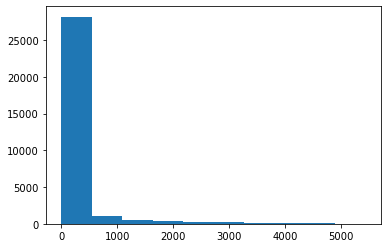

In [22]:
plt.hist(df['time_to_enroll'])

(array([1999.,  740.,  663.,  286.,  344.,  199.,  192.,  207.,  134.,
         179.]),
 array([  1. ,  10.9,  20.8,  30.7,  40.6,  50.5,  60.4,  70.3,  80.2,
         90.1, 100. ]),
 <BarContainer object of 10 artists>)

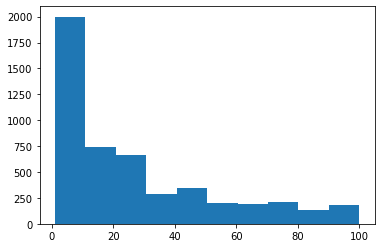

In [23]:
plt.hist(df['time_to_enroll'], range = (1, 100))

In [24]:
df.loc[df['time_to_enroll'] > 48, 'enrolled'] = 0

In [25]:
df.columns

Index(['user', 'first_open', 'dayofweek', 'hour', 'age', 'screen_list',
       'numscreens', 'minigame', 'used_premium_feature', 'enrolled',
       'enrolled_date', 'liked', 'time_to_enroll'],
      dtype='object')

In [26]:
df.drop(columns = ['first_open','enrolled_date', 'screen_list', 'time_to_enroll'], inplace = True)

In [27]:
df.head()

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked
0,235136,3,2,23,15,0,0,0,0
1,333588,6,1,24,13,0,0,0,0
2,254414,1,19,23,3,0,1,0,1
3,234192,4,16,28,40,0,0,1,0
4,51549,1,18,31,32,0,0,1,1


## Split Data

In [28]:
X = df.drop(columns = ['enrolled'])
y = df['enrolled']

In [100]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [101]:
train_user = X_train['user']
X_train.drop(columns = ['user'], inplace = True)
test_user = X_test['user']
X_test.drop(columns = ['user'], inplace = True)

C:\Users\HP\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [102]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((40000, 7), (10000, 7), (40000,), (10000,))

## Feature Scaling

In [103]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.fit_transform(X_test)

## Train Model

In [104]:
# without feature scaling

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
accuracy_score(y_test,y_pred_lr)

0.6349

In [105]:
# with feature scaling

lr = LogisticRegression()
lr.fit(X_train_sc, y_train)
y_pred_lr = lr.predict(X_test_sc)
accuracy_score(y_test,y_pred_lr)

0.6342

In [122]:
# without feature scaling

from sklearn.cluster import KMeans
km = KMeans(n_clusters = 2)
km.fit(X_train, y_train)
y_pred_km = km.predict(X_test)
accuracy_score(y_test, y_pred_km)

0.4136

In [124]:
# with feature scaling

km = KMeans(n_clusters = 2)
km.fit(X_train_sc, y_train)
y_pred_km = km.predict(X_test_sc)
accuracy_score(y_test, y_pred_km)

0.4877

In [108]:
# without feature scaling

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = lr.predict(X_test)
accuracy_score(y_test,y_pred_knn)

0.6442

In [132]:
# with feature scaling

knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train_sc, y_train)
y_pred_knn = lr.predict(X_test_sc)
accuracy_score(y_test,y_pred_knn)

0.6342

In [144]:
# without feature scaling

from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion = 'entropy')
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
accuracy_score(y_test,y_pred_dt)

0.5595

In [111]:
# with feature scaling

dt = DecisionTreeClassifier(criterion = 'gini')
dt.fit(X_train_sc, y_train)
y_pred_dt = dt.predict(X_test_sc)
accuracy_score(y_test,y_pred_dt)

0.5568

In [147]:
# without feature scaling

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(criterion = 'entropy', n_estimators = 200)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
accuracy_score(y_test,y_pred_rf)

0.6088

In [149]:
# with feature scaling

rf = RandomForestClassifier(criterion = 'entropy', n_estimators = 200)
rf.fit(X_train_sc, y_train)
y_pred_rf = rf.predict(X_test_sc)
accuracy_score(y_test,y_pred_rf)

0.6075

In [161]:
# without feature scaling

from sklearn.svm import SVC
svc_r = SVC(kernel='rbf',degree = 2)
svc_r.fit(X_train, y_train)
y_pred_svc_r = svc_r.predict(X_test)
accuracy_score(y_test, y_pred_svc_r)

0.6495

In [157]:
# with feature scaling

svc_r = SVC(kernel='rbf', degree = 2)
svc_r.fit(X_train_sc, y_train)
y_pred_svc_r = svc_r.predict(X_test_sc)
accuracy_score(y_test, y_pred_svc_r)

0.6488

In [159]:
# without feature scaling

from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred_gnb = gnb.predict(X_test)
accuracy_score(y_test, y_pred_gnb)

0.6244

In [160]:
# with feature scaling

gnb = GaussianNB()
gnb.fit(X_train_sc, y_train)
y_pred_gnb = gnb.predict(X_test_sc)
accuracy_score(y_test, y_pred_gnb)

0.6235

## Confusion Matrix

<AxesSubplot:>

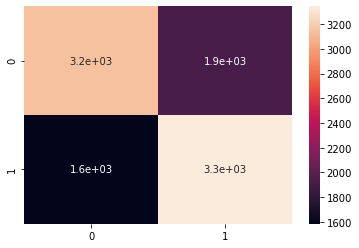

In [162]:
cm = confusion_matrix(y_test, y_pred_svc_r)
sns.heatmap(cm, annot = True)

## Classification Report

In [163]:
print(classification_report(y_test, y_pred_svc_r))

              precision    recall  f1-score   support

           0       0.67      0.62      0.64      5072
           1       0.64      0.68      0.66      4928

    accuracy                           0.65     10000
   macro avg       0.65      0.65      0.65     10000
weighted avg       0.65      0.65      0.65     10000



## Save the Model

In [164]:
import joblib
joblib.dump(svc_r, 'model_subs')
model = joblib.load('model_subs')

In [165]:
model.predict(X_test)

array([1, 1, 0, ..., 1, 1, 0], dtype=int64)

In [166]:
y_test

11841    1
19602    1
45519    0
25747    1
42642    1
        ..
25091    1
27853    1
47278    0
37020    1
2217     1
Name: enrolled, Length: 10000, dtype: int64